# SETANDO ALTERACOES

In [197]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from dotenv import load_dotenv

import datetime
from dateutil import relativedelta

import streamlit as st

load_dotenv()

try:

    df_brasileiro_cards = pd.read_csv(os.getenv('BRASILEIRO_CARTOES'))
    df_brasileiro_full = pd.read_csv(os.getenv('BRASILEIRO_FULL')) # PARTIDAS
    df_brasileiro_stats = pd.read_csv(os.getenv('BRASILEIRO_ESTATISTICAS'))
    df_brasileiro_gols = pd.read_csv(os.getenv('BRASILEIRO_GOLS'))

except:
    raise FileExistsError('Could not find database file')

df_fla_stats = df_brasileiro_stats.query("clube == 'Flamengo'")
df_fla_gols = df_brasileiro_gols.query("clube == 'Flamengo'")
df_fla_cards = df_brasileiro_cards.query("clube == 'Flamengo'")
df_fla_jogos = df_brasileiro_full.query("mandante == 'Flamengo' or visitante == 'Flamengo'")

#PEGANDO UNIDO AS ESTATÍSTICAS COM OS JOGOS E REMOVENDO DADOS COM CAMPOS VAZIOS
df_fla_jogos = df_fla_jogos.rename(columns={'ID':'partida_id'})
df_jogos_stats = pd.merge(df_fla_jogos, df_fla_stats, how = "left", on="partida_id")


df_jogos_stats = (
                    df_jogos_stats
                    .dropna()
                    .drop(['rodata_y'], axis = 1)
                    .rename(columns = {'rodata_x': 'rodata'})
                )

# TRAZENDO OS CAMPOS DE INTERESSE
df_fla_placar = df_jogos_stats[['partida_id', 'data','mandante','visitante','tecnico_visitante', 'tecnico_mandante','mandante_Placar','visitante_Placar','arena','formacao_mandante', 'formacao_visitante']]

# ADICINANDO COLUNA PARA FAZER O HISTÓRICO ANUAL

df_fla_placar = (
    df_fla_placar
    .assign(ano = pd.to_datetime(df_fla_placar['data']).dt.year)
    .assign(mes = pd.to_datetime(df_fla_placar['data']).dt.month)
    .assign(mensal_overview = pd.to_datetime(df_fla_placar["data"]))
    .assign(resultado = np.where(
                                    (df_fla_placar['mandante_Placar'] > df_fla_placar['visitante_Placar']) & (df_fla_placar['mandante'] == "Flamengo"), 'Vitoria',
                                    np.where(
                                        (df_fla_placar['mandante_Placar'] > df_fla_placar['visitante_Placar']) & (df_fla_placar['mandante'] != "Flamengo"), 'Derrota',
                                    np.where(
                                        (df_fla_placar['visitante_Placar'] > df_fla_placar['mandante_Placar']) & (df_fla_placar['mandante'] == "Flamengo"), 'Derrota',
                                    np.where(
                                        (df_fla_placar['visitante_Placar'] > df_fla_placar['mandante_Placar']) & (df_fla_placar['mandante'] != "Flamengo"), 'Vitoria', 'Empate'
                                    )))))
    .assign(oponente = np.where(df_fla_placar['mandante'] == 'Flamengo', df_fla_placar['visitante'], df_fla_placar['mandante']))
    .assign(cont_partidas = 1)
)

# FAZENDO A CONTAGEM DE RESULTADOS DO TIME

df_fla_placar = (
    df_fla_placar
    .assign(cont_empates = np.where(df_fla_placar['resultado'] == "Empate",1,0))
    .assign(cont_vitorias = np.where(df_fla_placar['resultado'] == "Vitoria",1,0))
    .assign(cont_derrotas = np.where(df_fla_placar['resultado'] == "Derrota",1,0))
    .assign(tecnico= np.where(df_fla_placar["mandante"] == "Flamengo", df_fla_placar["tecnico_mandante"], df_fla_placar["tecnico_visitante"]))
)

df_fla_placar["mensal_overview"] = df_fla_placar["mensal_overview"].apply(lambda x: x.replace(day = 1))

# fig, ax = plt.subplots()

# sns.set(style="dark", rc={
#     'axes.facecolor': 'gray',     # Fundo dos eixos
#     'figure.facecolor': 'black',   # Fundo da figura
#     'axes.edgecolor': 'white',     # Cor da borda dos eixos
#     'grid.color': 'gray',          # Cor da grade
#     'xtick.color': 'white',        # Cor dos ticks no eixo x
#     'ytick.color': 'white',        # Cor dos ticks no eixo y
#     'axes.labelcolor': 'white',    # Cor dos rótulos dos eixos
#     'text.color': 'white'          # Cor do texto
# })

# # sns.set(
# #     style="dark", rc = {
# #     "axes.facecolor": "black",
# #     "figure.facecolor": "black"
# #     }
# # )
# sns.lineplot(x='ano', y = 'derrotas', data = df_fla_overview_ano, ax = ax)
# # ax.set_box_aspect(aspect=0.5)
# ax.set_title('Vitorias - Ano')
df_fla_placar


C:\Users\joaop\AppData\Local\Temp\ipykernel_14168\3420731750.py:51: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  .assign(ano = pd.to_datetime(df_fla_placar['data']).dt.year)
C:\Users\joaop\AppData\Local\Temp\ipykernel_14168\3420731750.py:52: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  .assign(mes = pd.to_datetime(df_fla_placar['data']).dt.month)
C:\Users\joaop\AppData\Local\Temp\ipykernel_14168\3420731750.py:53: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  .assign(mensal_overview = pd.to_datetime(df_fla_placar["data"]))


,partida_id,data,mandante,visitante,tecnico_visitante,tecnico_mandante,mandante_Placar,visitante_Placar,arena,formacao_mandante,...,ano,mes,mensal_overview,resultado,oponente,cont_partidas,cont_empates,cont_vitorias,cont_derrotas,tecnico
590,6127,14/04/2018,Vitoria,Flamengo,M. Nogueira Barbieri,V. Carmo Mancini,2,2,Barradão,4-2-3-1,...,2018,4,2018-04-01,Empate,Vitoria,1,1,0,0,M. Nogueira Barbieri
591,6137,21/04/2018,Flamengo,America-MG,E. Alves Moreira,M. Nogueira Barbieri,2,0,Maracanã,4-1-4-1,...,2018,4,2018-04-01,Vitoria,America-MG,1,0,1,0,M. Nogueira Barbieri
592,6148,29/04/2018,Ceara,Flamengo,M. Nogueira Barbieri,M. Oliveira Chamusca,0,3,Arena Castelão,3-4-2-1,...,2018,4,2018-04-01,Vitoria,Ceara,1,0,1,0,M. Nogueira Barbieri
593,6159,06/05/2018,Flamengo,Internacional,O. Hellmann,M. Nogueira Barbieri,2,0,Maracanã,4-1-4-1,...,2018,5,2018-05-01,Vitoria,Internacional,1,0,1,0,M. Nogueira Barbieri
594,6172,13/05/2018,Chapecoense,Flamengo,M. Nogueira Barbieri,G. Kleina,3,2,Arena Condá,4-1-4-1,...,2018,5,2018-05-01,Derrota,Chapecoense,1,0,0,1,M. Nogueira Barbieri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,8325,23/11/2023,Flamengo,Bragantino,P. Faria Caixinha,A. Bacchi,1,0,Maracanã,4-2-3-1,...,2023,11,2023-11-01,Vitoria,Bragantino,1,0,1,0,A. Bacchi
814,8371,26/11/2023,America-MG,Flamengo,A. Bacchi,D. Giacomini,0,3,Estádio Municipal Parque do Sabiá,4-2-3-1,...,2023,11,2023-11-01,Vitoria,America-MG,1,0,1,0,A. Bacchi
815,8378,29/11/2023,Flamengo,Atletico-MG,L. Scolari,A. Bacchi,0,3,Maracanã,4-2-3-1,...,2023,11,2023-11-01,Derrota,Atletico-MG,1,0,0,1,A. Bacchi
816,8388,03/12/2023,Flamengo,Cuiaba,A. Cardoso de Oliveira,A. Bacchi,2,1,Maracanã,4-2-3-1,...,2023,12,2023-12-01,Vitoria,Cuiaba,1,0,1,0,A. Bacchi


# PROJEÇÃO DE RESULTADOS NO ANO DE 2023

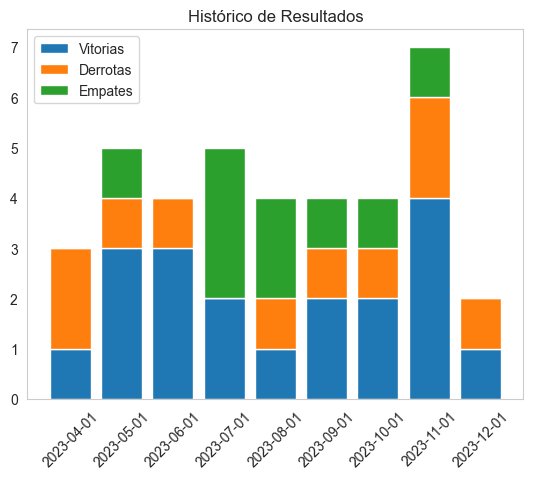

,partida_id,data,mandante,visitante,tecnico_visitante,tecnico_mandante,mandante_Placar,visitante_Placar,arena,formacao_mandante,formacao_visitante,ano,mes,mensal_overview,resultado,cont_empates,cont_vitorias,cont_derrotas,tecnico
590,6127,14/04/2018,Vitoria,Flamengo,M. Nogueira Barbieri,V. Carmo Mancini,2,2,Barradão,4-2-3-1,4-1-4-1,2018,4,2018-04-01,Empate,1,0,0,M. Nogueira Barbieri
591,6137,21/04/2018,Flamengo,America-MG,E. Alves Moreira,M. Nogueira Barbieri,2,0,Maracanã,4-1-4-1,4-2-3-1,2018,4,2018-04-01,Vitoria,0,1,0,M. Nogueira Barbieri
592,6148,29/04/2018,Ceara,Flamengo,M. Nogueira Barbieri,M. Oliveira Chamusca,0,3,Arena Castelão,3-4-2-1,4-3-3,2018,4,2018-04-01,Vitoria,0,1,0,M. Nogueira Barbieri
593,6159,06/05/2018,Flamengo,Internacional,O. Hellmann,M. Nogueira Barbieri,2,0,Maracanã,4-1-4-1,4-1-4-1,2018,5,2018-05-01,Vitoria,0,1,0,M. Nogueira Barbieri
594,6172,13/05/2018,Chapecoense,Flamengo,M. Nogueira Barbieri,G. Kleina,3,2,Arena Condá,4-1-4-1,4-1-4-1,2018,5,2018-05-01,Derrota,0,0,1,M. Nogueira Barbieri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,8325,23/11/2023,Flamengo,Bragantino,P. Faria Caixinha,A. Bacchi,1,0,Maracanã,4-2-3-1,4-2-3-1,2023,11,2023-11-01,Vitoria,0,1,0,A. Bacchi
814,8371,26/11/2023,America-MG,Flamengo,A. Bacchi,D. Giacomini,0,3,Estádio Municipal Parque do Sabiá,4-2-3-1,4-2-3-1,2023,11,2023-11-01,Vitoria,0,1,0,A. Bacchi
815,8378,29/11/2023,Flamengo,Atletico-MG,L. Scolari,A. Bacchi,0,3,Maracanã,4-2-3-1,4-4-2,2023,11,2023-11-01,Derrota,0,0,1,A. Bacchi
816,8388,03/12/2023,Flamengo,Cuiaba,A. Cardoso de Oliveira,A. Bacchi,2,1,Maracanã,4-2-3-1,3-4-2-1,2023,12,2023-12-01,Vitoria,0,1,0,A. Bacchi


In [163]:
vitorias   = (
                df_fla_placar
                .query('mensal_overview >= "2023-01-01"')
                [['cont_vitorias','mensal_overview']]
                .groupby('mensal_overview')
                .agg('sum')
                .reset_index()
                .drop(['mensal_overview'], axis = 1)
            )

derrotas   = (
                df_fla_placar
                .query('mensal_overview >= "2023-01-01"')
                [['cont_derrotas','mensal_overview']]
                .groupby('mensal_overview')
                .agg('sum')
                .reset_index()
                .drop(['mensal_overview'], axis = 1)
            )

empates   = (
                df_fla_placar
                .query('mensal_overview >= "2023-01-01"')
                [['cont_empates','mensal_overview']]
                .groupby('mensal_overview')
                .agg('sum')
                .reset_index()
                .drop(['mensal_overview'], axis = 1)
            )

# sns.set_style("whitegrid")

categorias = (
                df_fla_placar
                .query('mensal_overview >= "2023-01-01"')
                ['mensal_overview']
                .astype(str)
                .drop_duplicates()
             )

# Definir as posições das barras (eixo X)

# Criar gráfico de barras empilhadas
plt.bar(categorias, vitorias['cont_vitorias'], label='Vitorias', color=sns.color_palette()[0])
plt.bar(categorias, derrotas['cont_derrotas'], bottom=vitorias['cont_vitorias'], label='Derrotas', color=sns.color_palette()[1])
plt.bar(categorias, empates['cont_empates'], bottom=vitorias['cont_vitorias'] + derrotas['cont_derrotas'], label='Empates', color=sns.color_palette()[2])

# Adicionar legendas e títulos

plt.title('Histórico de Resultados')
plt.legend()
plt.xticks(rotation=45)
plt.grid(False)

# Exibir o gráfico
plt.show()
df_fla_placar

In [179]:
# SETANDO OS DFS PARA VER OS NÚMEROS DO FLAMENGO COM MANDANTE E COMO VISITANTE

df_fla_visitante = df_fla_placar[df_fla_placar['visitante'] == 'Flamengo']
df_fla_mandante = df_fla_placar[df_fla_placar['mandante'] == 'Flamengo']

df_fla_visitante_overview = df_fla_visitante.groupby('visitante')[['cont_derrotas', 'cont_vitorias', 'cont_empates']].agg('sum')
df_fla_mandante_overview = df_fla_mandante.groupby('mandante')[['cont_derrotas', 'cont_vitorias', 'cont_empates']].agg('sum')

df_fla_visitante_overview
df_fla_mandante_overview

,cont_derrotas,cont_vitorias,cont_empates
mandante,,,
Flamengo,21,76,17


In [222]:
# ANALISANDO RESULTADOS DO FLAMENGO POR TIME

df_fla_resultados_times = (
                            df_fla_placar
                            .groupby('oponente')
                            [['cont_derrotas','cont_vitorias', 'cont_empates','cont_partidas']]
                            .agg('sum')
                            .reset_index()
                            .assign(percentual_vitorias = (df_fla_resultados_times['cont_vitorias']/df_fla_resultados_times['cont_partidas']))
                            .sort_values(by = ['cont_vitorias','cont_partidas'], ascending = False)
                          )

,partida_id,data,mandante,visitante,tecnico_visitante,tecnico_mandante,mandante_Placar,visitante_Placar,arena,formacao_mandante,...,ano,mes,mensal_overview,resultado,oponente,cont_partidas,cont_empates,cont_vitorias,cont_derrotas,tecnico
595,6177,19/05/2018,Flamengo,Vasco,J. Mannarino,M. Nogueira Barbieri,1,1,Maracanã,4-1-4-1,...,2018,5,2018-05-01,Empate,Vasco,1,1,0,0,M. Nogueira Barbieri
614,6368,15/09/2018,Vasco,Flamengo,M. Nogueira Barbieri,A. Valentim do Carmo Neto,1,1,Estádio Nacional de Brasília,4-3-2-1,...,2018,9,2018-09-01,Empate,Vasco,1,1,0,0,M. Nogueira Barbieri
642,6648,17/08/2019,Vasco,Flamengo,J. Pinheiro de Jesus,V. Luxemburgo da Silva,1,4,Estádio Nacional de Brasília,4-3-3,...,2019,8,2019-08-01,Vitoria,Vasco,1,0,1,0,J. Pinheiro de Jesus
660,6826,13/11/2019,Flamengo,Vasco,V. Luxemburgo da Silva,J. Pinheiro de Jesus,4,4,Maracanã,4-2-3-1,...,2019,11,2019-11-01,Empate,Vasco,1,1,0,0,J. Pinheiro de Jesus
679,7026,10/10/2020,Vasco,Flamengo,D. Torrent Font,A. Grasselli,1,2,Estádio Vasco da Gama,4-2-3-1,...,2020,10,2020-10-01,Vitoria,Vasco,1,0,1,0,D. Torrent Font
699,7222,04/02/2021,Flamengo,Vasco,V. Luxemburgo da Silva,R. Ceni,2,0,Maracanã,4-4-2,...,2021,2,2021-02-01,Vitoria,Vasco,1,0,1,0,R. Ceni
788,8115,05/06/2023,Vasco,Flamengo,J. Sampaoli Moya,M. Nogueira Barbieri,1,4,Maracanã,3-4-3,...,2023,6,2023-06-01,Vitoria,Vasco,1,0,1,0,J. Sampaoli Moya
807,8301,22/10/2023,Flamengo,Vasco,R. Díaz,A. Bacchi,1,0,Maracanã,4-2-3-1,...,2023,10,2023-10-01,Vitoria,Vasco,1,0,1,0,A. Bacchi
